In [25]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage.morphology import skeletonize

In [26]:
image = cv2.imread('data/2.jpg')

In [27]:
def show_image(image):
    plt.imshow(image)
    plt.axis('off')
    plt.show()

In [281]:
def get_skeleton_begginer(image):
    # make open close and dilation operations to clean image
    kernel = np.ones((5,5), np.uint8)
    image = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
    image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    image = cv2.dilate(image, kernel, iterations=1)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edges = cv2.Canny(blurred, 50, 150)
    _, binary_image = cv2.threshold(edges, 127, 255, cv2.THRESH_BINARY)
    binary_image = binary_image // 255
    skeleton = skeletonize(binary_image)
    skeleton = (skeleton * 255).astype(np.uint8)
    #  dilate the image to make the lines thicker
    kernel = np.ones((16,16), np.uint8)
    skeleton = cv2.dilate(skeleton, kernel, iterations=1)
    return skeleton

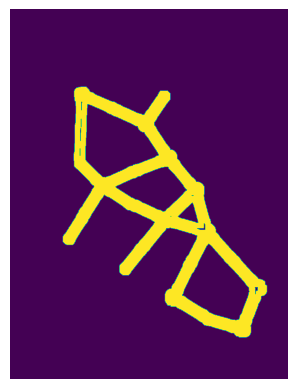

In [282]:
image = cv2.imread('data/2.jpg')
skeleton = get_skeleton_begginer(image)
show_image(skeleton)

(-0.5, 767.5, 1023.5, -0.5)

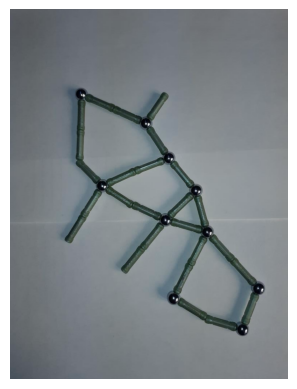

In [28]:
plt.imshow(image)
plt.axis('off')

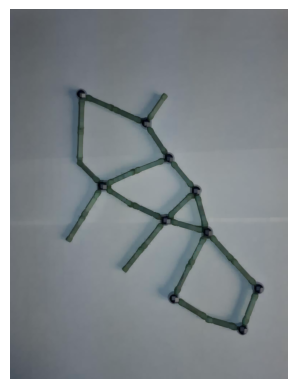

In [29]:
# make open close and dilation operations to clean image
kernel = np.ones((5,5), np.uint8)
image = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
image = cv2.dilate(image, kernel, iterations=1)

show_image(image)


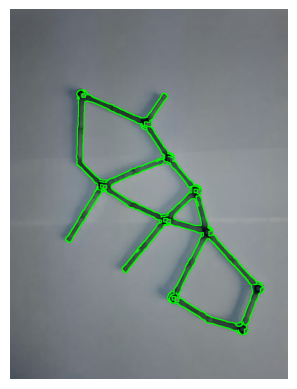

In [30]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Шаг 3: Применить размытие для уменьшения шумов
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Шаг 4: Использовать алгоритм Canny для обнаружения границ
edges = cv2.Canny(blurred, 50, 150)

# Шаг 5: Найти контуры
contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Шаг 6: Нарисовать найденные контуры на исходном изображении
contour_image = image.copy()
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)

show_image(contour_image)

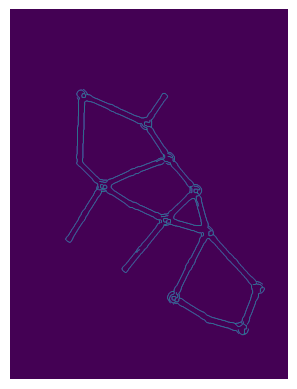

In [31]:
_, binary_image = cv2.threshold(edges, 127, 255, cv2.THRESH_BINARY)

# Преобразование бинарного изображения в формат подходящий для скелетизации
binary_image = binary_image // 255

# Выполнение скелетизации
skeleton = skeletonize(binary_image)
# Преобразование скелетизованного изображения обратно в 8-битное для отображения
skeleton = (skeleton * 255).astype(np.uint8)
show_image(skeleton)

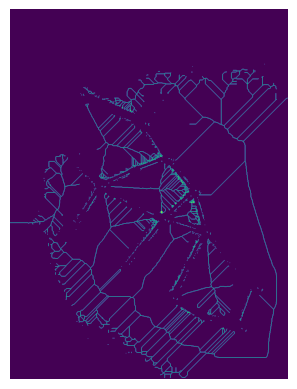

In [277]:
image = cv2.imread('data/2.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
edges = cv2.Canny(blurred, 50, 150)
_, binary_image = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
# get skeleton image
skeleton = skeletonize(binary_image // 255)
# convert to 8-bit for display
skeleton = (skeleton * 255).astype(np.uint8)
show_image(skeleton)

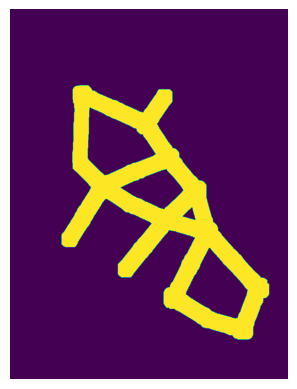

In [34]:
# perform dilation to make lines thicker
kernel = np.ones((12,12), np.uint8)
skeleton = cv2.dilate(skeleton, kernel, iterations=1)
show_image(skeleton)

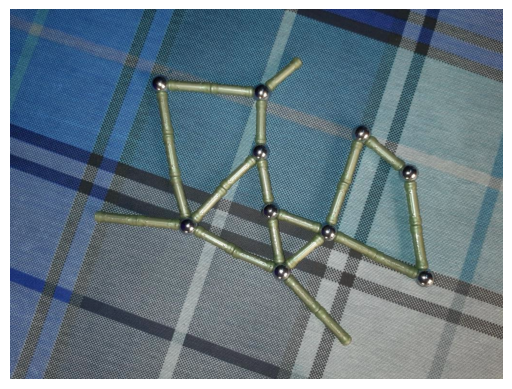

In [35]:
exp = cv2.imread('data/18.jpg')
show_image(exp)

In [140]:
def show_history(history):
    fig, axs = plt.subplots(1, len(history), figsize=(40, 40))
    for i, image in enumerate(history):
        axs[i].imshow(image)
        axs[i].axis('off')
    plt.show()

def skeleton_image_binarization(image):
    green_thres = 120
    red_thres = 110

    red = image[:,:,2]
    green = image[:,:,1]

    red_mask = red < red_thres
    green_mask = green > green_thres

    mask = red_mask & green_mask
    return mask

def binarization_postprocessing(image):
    kernel = np.ones((20, 20), np.uint8)
    image = cv2.dilate(image.astype(np.uint8), kernel, iterations=1)
    image = cv2.morphologyEx(image.astype(np.uint8), cv2.MORPH_CLOSE, kernel)
    return image

def retrieve_skeleton(image):
    image = skeletonize(image)
    return image

def skeleton_postprocessing(image):
    kernel = np.ones((12,12), np.uint8)
    image = cv2.dilate(image.astype(np.uint8), kernel, iterations=1)
    return image

def get_skeleton_pro(image):
    history = [image]
    image = skeleton_image_binarization(image)
    history.append(image.astype(np.uint8) * 255)
    image = binarization_postprocessing(image)
    history.append(image.astype(np.uint8) * 255)
    image = retrieve_skeleton(image)
    history.append(image.astype(np.uint8) * 255)
    image = skeleton_postprocessing(image)
    history.append(image.astype(np.uint8) * 255)
    return image, history


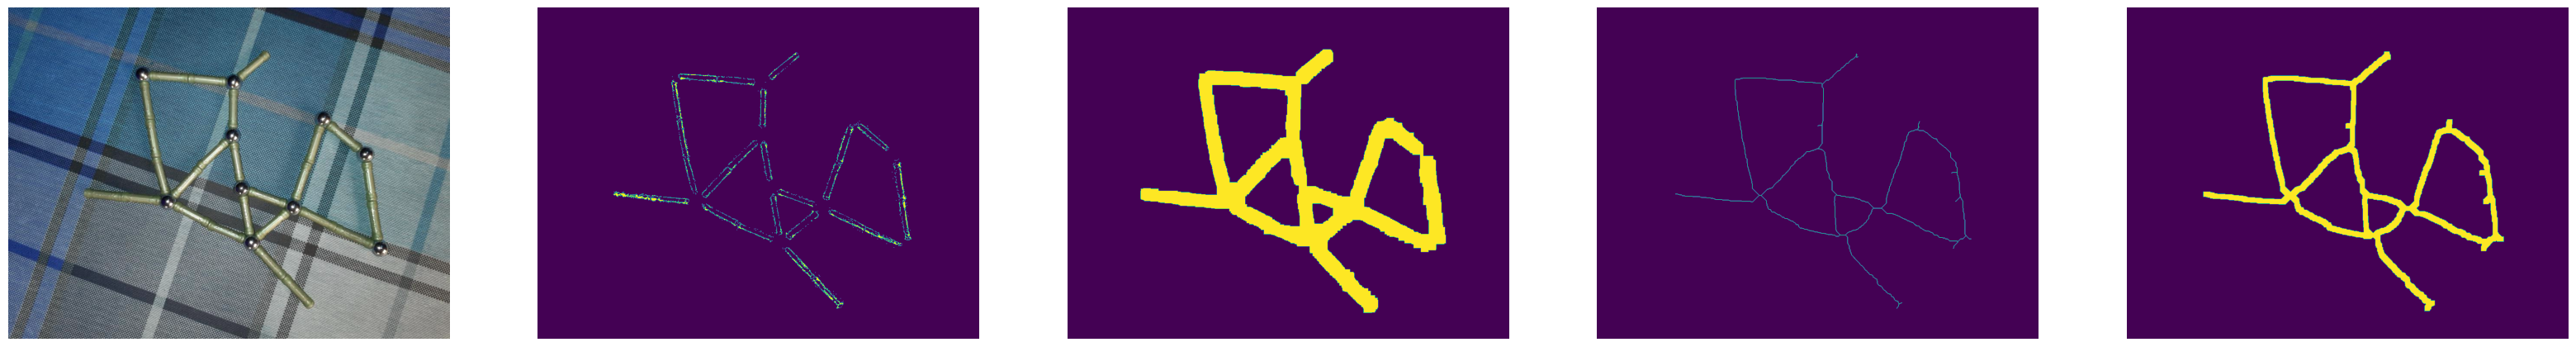

In [139]:
image = cv2.imread('data/18.jpg')
skeleton, history = get_skeleton_pro(image)
show_history(history)

In [157]:
def scale_array(array):
    min_value = np.min(array)
    max_value = np.max(array)
    scaled_array = (array - min_value) / (max_value - min_value)
    return scaled_array

def vertices_binary(image):
    blue_mask = image[:,:,0] < 40
    red_mask = image[:,:,2] < 40
    green_mask = image[:,:,1] < 40

    mask = blue_mask & red_mask & green_mask
    return mask

def clean_vertices_image(image):
    kernel = np.ones((3,3), np.uint8)
    image = cv2.erode(image.astype(np.uint8), kernel, iterations=1)
    kernel = np.ones((7,7), np.uint8)
    image = cv2.dilate(image.astype(np.uint8), kernel, iterations=1)
    kernel = np.ones((15,15), np.uint8)
    image = cv2.morphologyEx(image.astype(np.uint8), cv2.MORPH_CLOSE, kernel)
    return image

def make_vertices_thicker(image):
    kernel = np.ones((25, 25), np.uint8)
    image = cv2.dilate(image.astype(np.uint8), kernel, iterations=1)
    return image

def impose_vertices_on_skeleton(skeleton, vertices):
    skeleton = scale_array(skeleton)
    vertices = scale_array(vertices)
    kernel = np.ones((5, 5), np.uint8)
    vertices = cv2.dilate(vertices.astype(np.uint8), kernel, iterations=1)
    kernel = np.ones((10, 10), np.uint8)
    skeleton = cv2.dilate(skeleton.astype(np.uint8), kernel, iterations=1)

    skeleton = skeleton > 0.5
    vertices = vertices > 0.5
    mask = skeleton & vertices
    return mask


def get_vertices(image, figure_mask):
    history = [image]
    image = vertices_binary(image)
    history.append(image.astype(np.uint8) * 255)
    image = clean_vertices_image(image)
    history.append(image.astype(np.uint8) * 255)
    image = make_vertices_thicker(image)
    history.append(image.astype(np.uint8) * 255)
    image = impose_vertices_on_skeleton(figure_mask, image)
    history.append(image.astype(np.uint8) * 255)
    return image, history

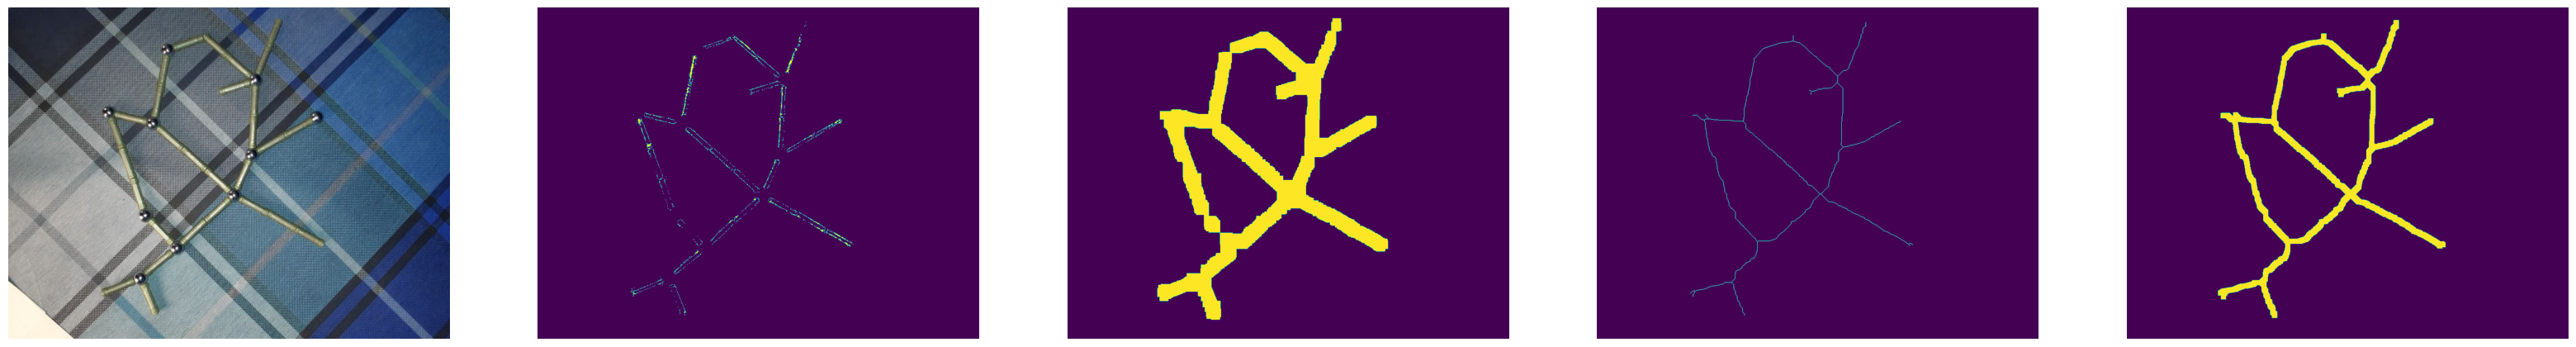

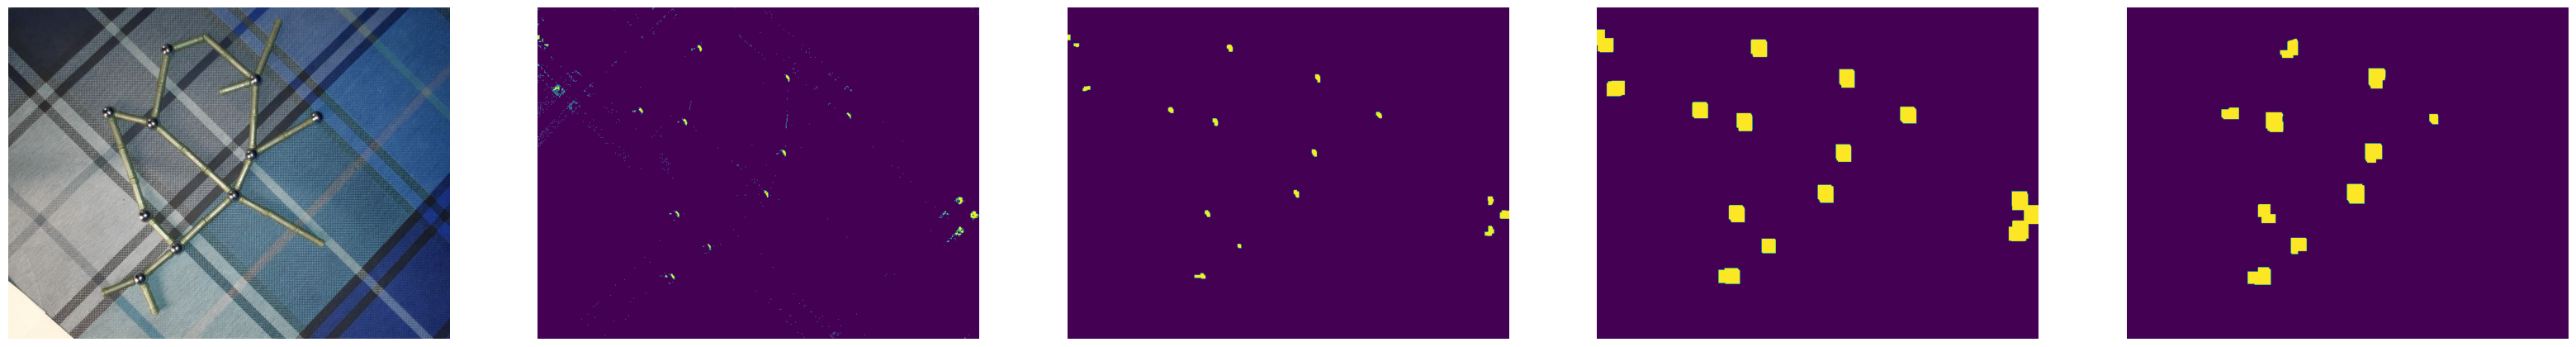

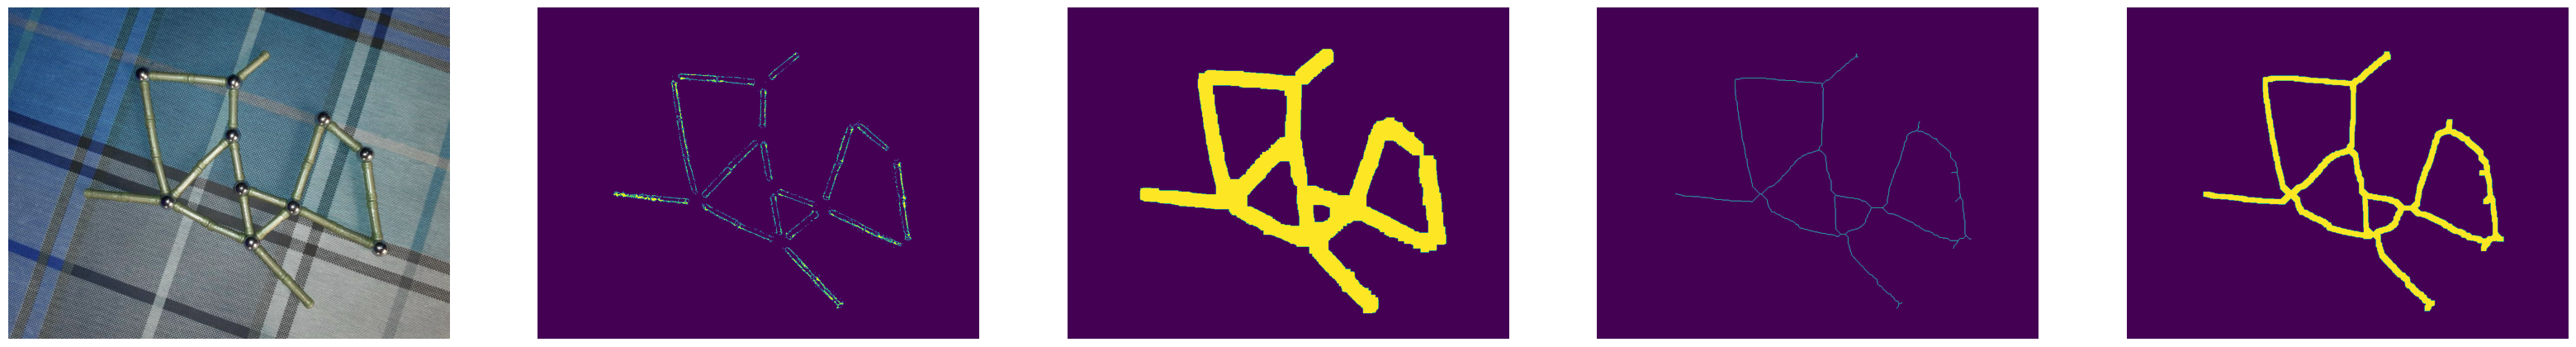

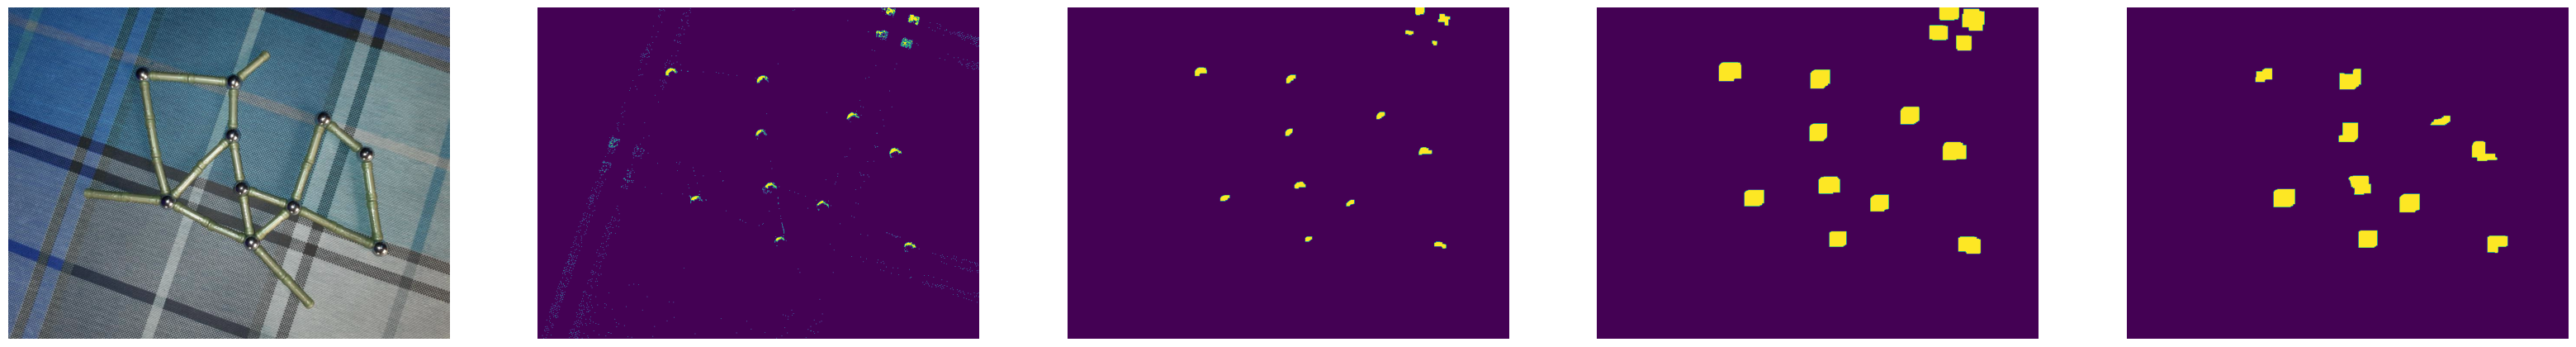

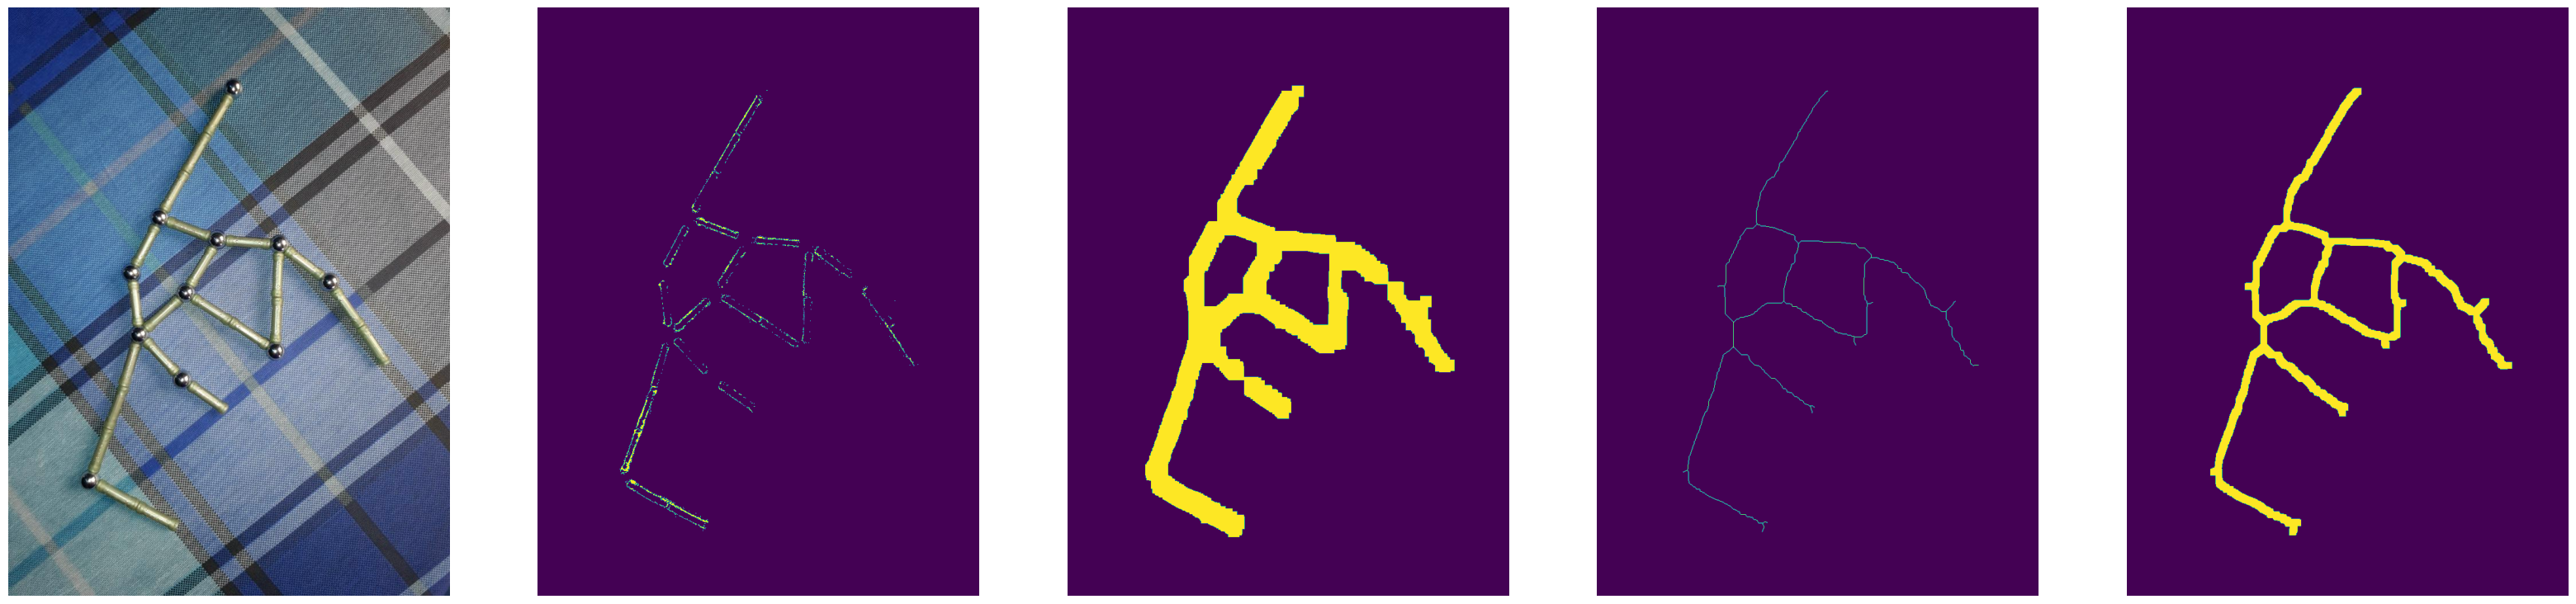

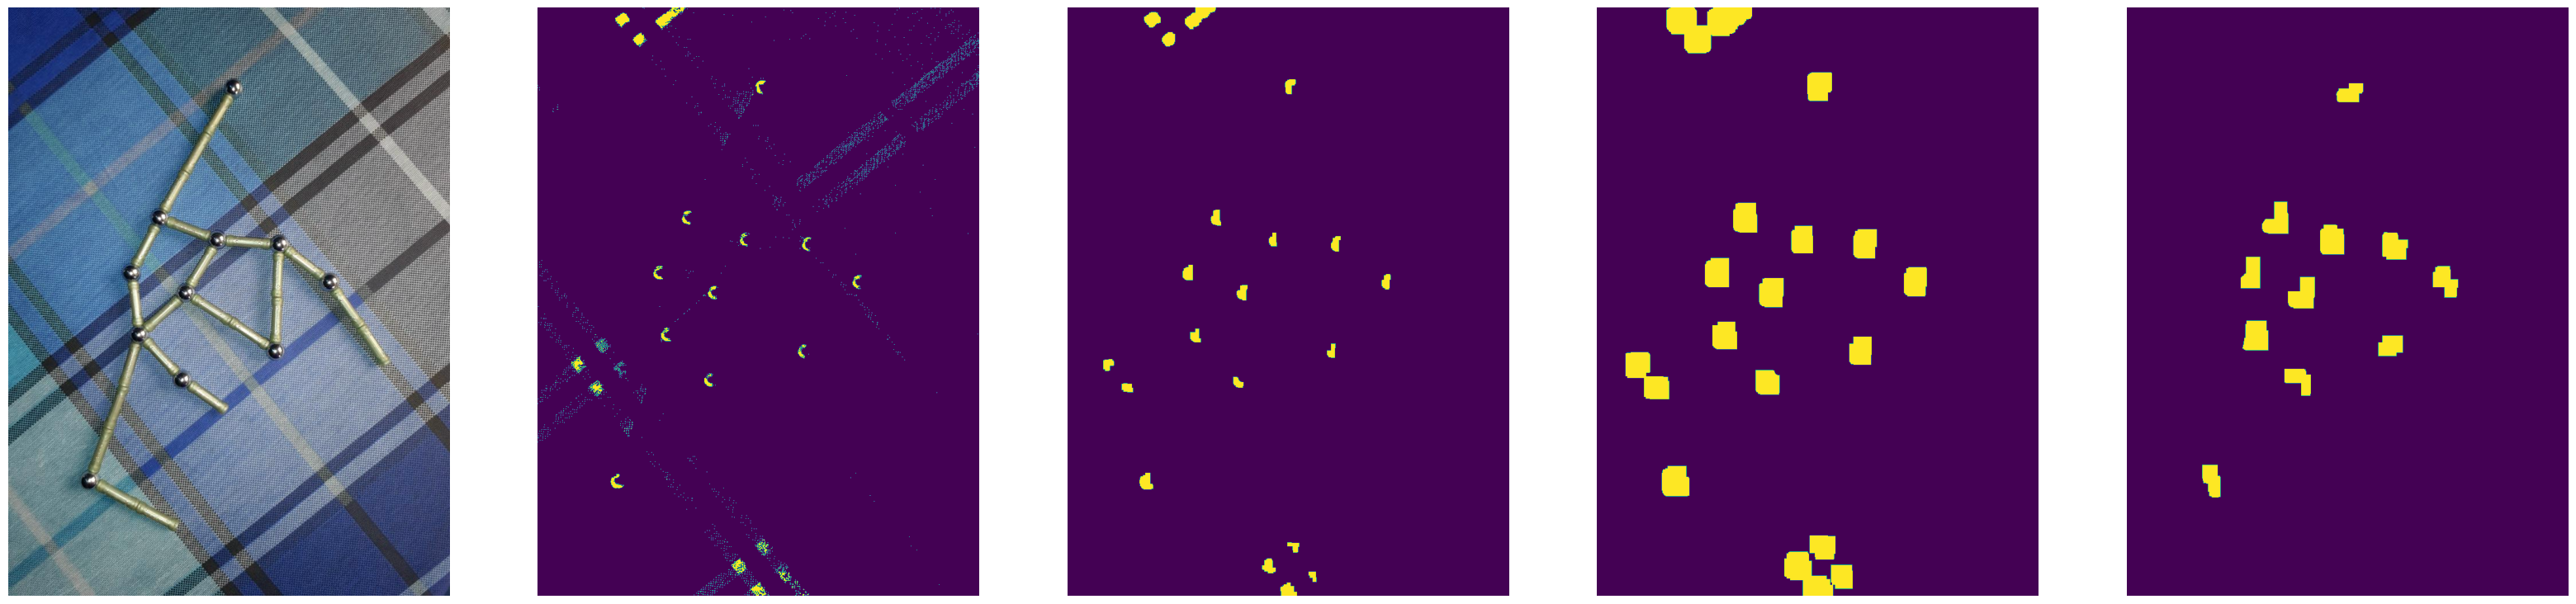

In [161]:
image = cv2.imread('data/9.jpg')
skeleton, history = get_skeleton_pro(image)
show_history(history)
mask = history[2]
vertices, history = get_vertices(image, mask)
show_history(history)

image2 = cv2.imread('data/18.jpg')
skeleton, history = get_skeleton_pro(image2)
show_history(history)
mask = history[2]
vertices, history = get_vertices(image2, mask)
show_history(history)

image2 = cv2.imread('data/29.jpg')
skeleton, history = get_skeleton_pro(image2)
show_history(history)
mask = history[2]
vertices, history = get_vertices(image2, mask)
show_history(history)

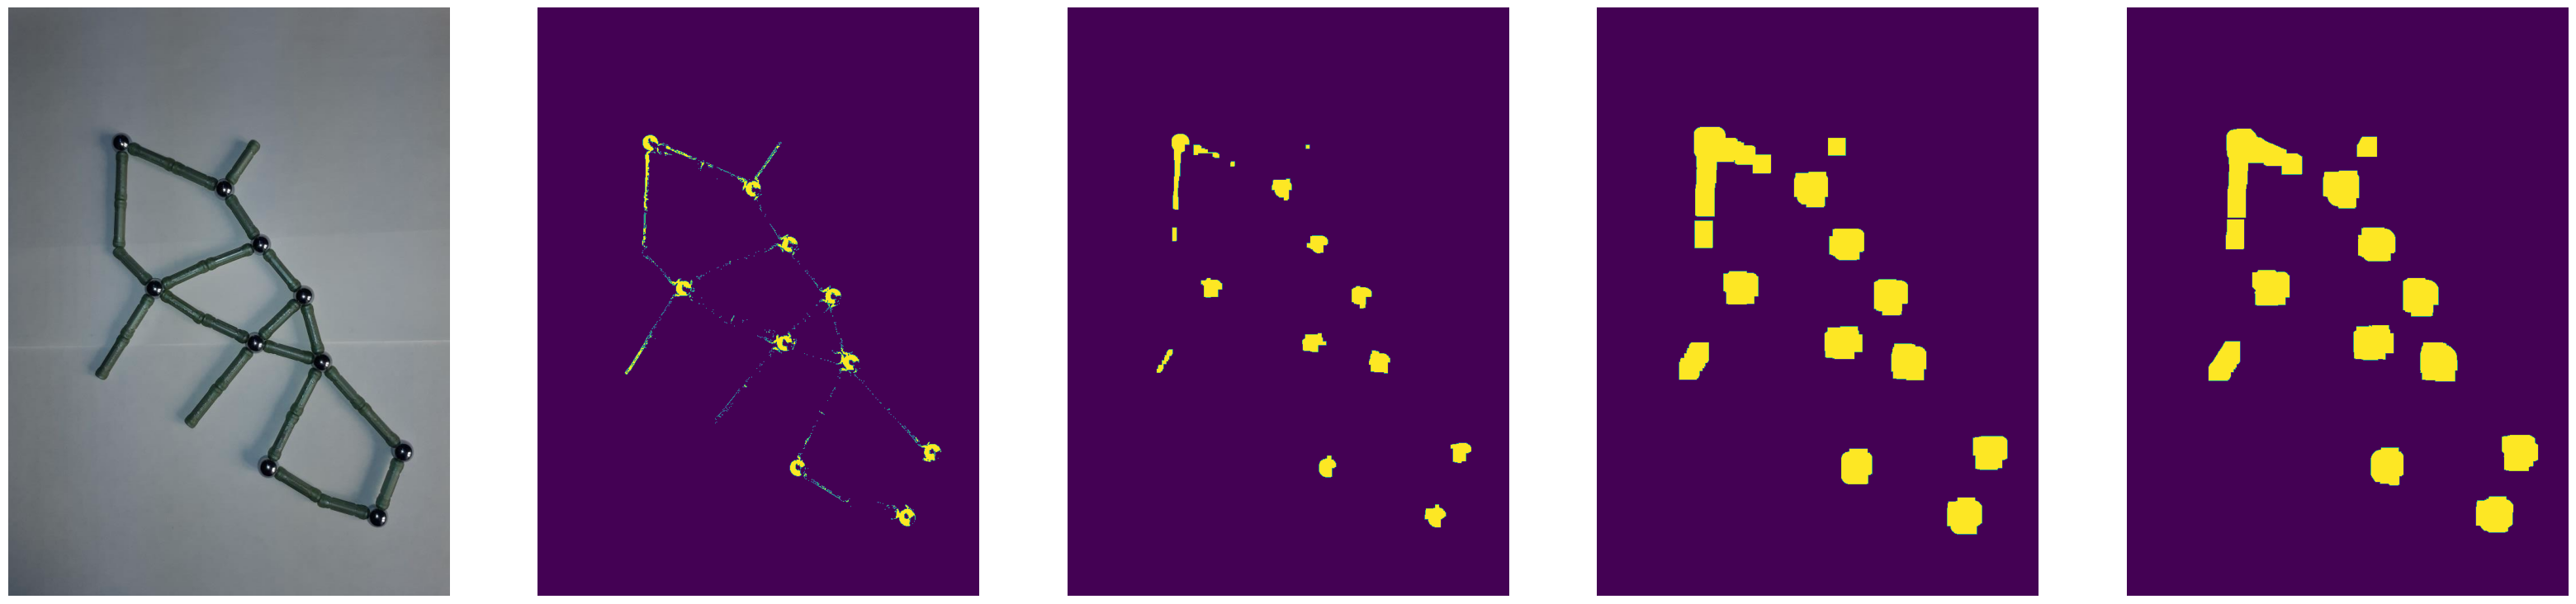

In [283]:
image = cv2.imread('data/2.jpg')
skeleton = get_skeleton_begginer(image)
vertices, history = get_vertices(image, skeleton)
show_history(history)

In [299]:
def get_vertices_centers(image):
    image = image.astype(np.uint8) * 255
    edges = cv2.Canny(image, 50, 150)
    contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # filter couhtours by area
    contours = [contour for contour in contours if cv2.contourArea(contour) > 100]

    print(len(contours))
    centers = []
    for contour in contours:
        M = cv2.moments(contour)
        if M['m00'] != 0:
            center_x = int(M['m10'] / M['m00'])
            center_y = int(M['m01'] / M['m00'])
            centers.append((center_x, center_y))
    
    # clear duplicates
    centers = list(set(centers))
    return centers

def draw_vertices_centers(image, centers):
    for center in centers:
        cv2.circle(image, center, 5, (0, 0, 255), -1)
    return image
    

def crop_images_around_centers(image, centers, crop_size):
    cropped_images = []
    for center in centers:
        x, y = center
        x1 = max(0, x - crop_size // 2)
        x2 = min(image.shape[1], x + crop_size // 2)
        y1 = max(0, y - crop_size // 2)
        y2 = min(image.shape[0], y + crop_size // 2)

        # Проверяем, чтобы область обрезки была допустимого размера
        if x2 > x1 and y2 > y1:
            cropped_image = image[y1:y2, x1:x2]
            cropped_images.append(cropped_image)
        else:
            print(f"Invalid crop area for center {center} with crop size {crop_size}")

    return cropped_images

def get_border_array(array):
    # Выбор крайних элементов по горизонтали и вертикали
    top_row = array[0, :]      # верхняя строка
    bottom_row = array[-1, :]  # нижняя строка
    left_column = array[:, 0]  # левый столбец
    right_column = array[:, -1]  # правый столбец
    edge_values = np.concatenate([top_row, right_column, bottom_row, left_column])
    return edge_values

def count_vp(vertice_image):
    if vertice_image.shape[0] == 0 or vertice_image.shape[1] == 0:
        return 1

    min_ = np.min(vertice_image)
    max_ = np.max(vertice_image)
    if min_ == max_:
        return 1
    vertice_image = scale_array(vertice_image)
    border = get_border_array(vertice_image)
    cur = border[0]
    power = 0
    for i in range(1, len(border)):
        if border[i] != cur:
            if cur == 1:
                power += 1
            cur = border[i]
    return min(power, 4)


def count_vertices_powers(image, vertices):
    cropped_images = crop_images_around_centers(image, vertices, 160)
    powers = []
    for cropped_image in cropped_images:
        power = count_vp(cropped_image)
        powers.append(power)
    label = []
    for i in range(1, max(powers) + 1):
        label.append(powers.count(i))
    return label


In [300]:
def get_image_label(image):
    skeleton, history = get_skeleton_pro(image)
    mask = history[2]
    vertices, history = get_vertices(image, mask)
    centers = get_vertices_centers(vertices)
    label = count_vertices_powers(skeleton, centers)
    return label

In [301]:
image = cv2.imread('data/9.jpg')
skeleton, history = get_skeleton_pro(image)
tmp = history[-1]
mask = history[2]
vertices, history = get_vertices(image, mask)

centers = get_vertices_centers(vertices)
print(f"Length: {len(centers)}")
image = draw_vertices_centers(image, centers)

label = count_vertices_powers(tmp, centers)
print(label)

20
Length: 11
[2, 2, 2, 5]


In [305]:
def get_image_label_beginner(image):
    skeleton = get_skeleton_begginer(image)
    vertices, history = get_vertices(image, skeleton)
    show_image(vertices)
    centers = get_vertices_centers(vertices)
    label = count_vertices_powers(skeleton, centers)
    return label

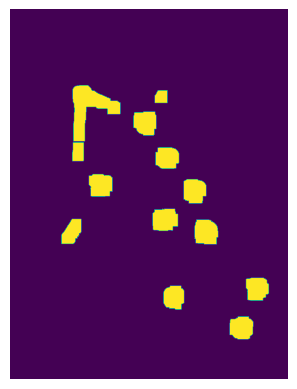

24
len: [(681, 773), (417, 242), (217, 273), (249, 486), (508, 502), (638, 881), (433, 411), (372, 314), (452, 797), (187, 394), (170, 616), (540, 616)]
[1, 3, 2, 6]


In [306]:
image = cv2.imread('data/2.jpg')
label = get_image_label_beginner(image)
print(label)